<a href="https://colab.research.google.com/github/Umamcode/Data-Mining-Umam/blob/Praktikum-2/Praktikum_Mandiri_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
import pandas as pd
import numpy as np
#Importing dan Exporting Data
df = pd.read_csv('/content/drive/MyDrive/Semester3/Peminatan/Data_Mining/Dataset/ufc-fighters-statistics.csv')
df

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,John Campetella,NaN,0,1,0,175.26,106.59,NaN,Orthodox,NaN,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4107,Andre Pederneiras,NaN,1,1,2,172.72,70.31,NaN,Orthodox,1967-03-22,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4108,Bryson Kamaka,NaN,12,20,1,180.34,77.11,NaN,Orthodox,NaN,9.47,60.0,12.63,0.0,0.00,0.0,100.0,0.0
4109,Matej Penaz,Money,6,1,0,190.50,83.91,210.82,Southpaw,1996-10-14,1.28,33.0,2.55,33.0,0.00,0.0,0.0,0.0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4111 non-null   object 
 1   nickname                                      2257 non-null   object 
 2   wins                                          4111 non-null   int64  
 3   losses                                        4111 non-null   int64  
 4   draws                                         4111 non-null   int64  
 5   height_cm                                     3813 non-null   float64
 6   weight_in_kg                                  4024 non-null   float64
 7   reach_in_cm                                   2184 non-null   float64
 8   stance                                        3288 non-null   object 
 9   date_of_birth                                 2976 non-null   o

**Mencari Mean, Median, Mode**

In [71]:
# Menghitung Mean
df['height_cm'].mean()

178.23432467873064

In [72]:
# Menghitung Median
df['height_cm'].median()

177.8

In [73]:
# Menghitung Modus
df['height_cm'].mode()

,height_cm
0,182.88


In [74]:
q1 = df['weight_in_kg'].quantile(0.25)
print("Q1 : ", q1)
q3 = df['height_cm'].quantile(0.75)
print("Q3 : ", q3)
iqr = q3 - q1
print("IQR:", iqr)

Q1 :  65.77
Q3 :  185.42
IQR: 119.64999999999999


<Axes: >

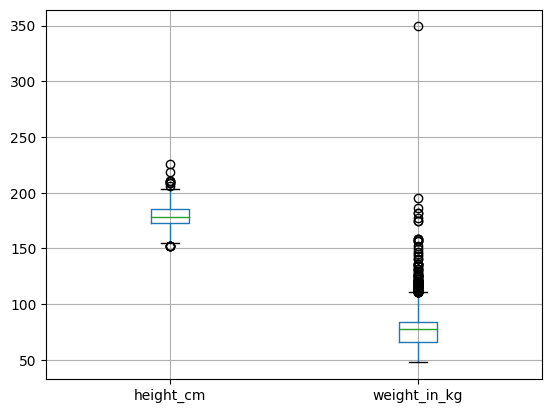

In [75]:
# Visualisasi dengan Bloxpot
import matplotlib.pyplot as plt

df.boxplot(column=['height_cm', 'weight_in_kg'])

Hitung Quartil Pertama dan Ketiga dan Hilangkan Outliernya


In [76]:
# Height
# Hitung kuartil pertama (Q1)
q1_h = df['height_cm'].quantile(0.25)
print("q1_h : ", q1_h)
# Hitung kuartil ketiga (Q3)
q3_h = df['height_cm'].quantile(0.75)
print("q3_h : ", q3_h)
iqr_h = q3_h - q1_h

# Hitung batas bawah (Lower Bound) dan batas atas (Upper Bound) untuk outlier
lower_bound_h = q1_h - 1.0 * iqr_h
upper_bound_h = q3_h + 1.0 * iqr_h

# Menghapus outlier
df_cleaned_h = df[(df['height_cm'] >= lower_bound_h) & (df['height_cm'] <= upper_bound_h)]
#df_cleaned_weight = df[(df['weight_in_kg'] >= lower_bound) & (df['weight_in_kg'] <= upper_bound)]

print("Outlier height_cm:")
print(df_cleaned_h)

q1_h :  172.72
q3_h :  185.42
Outlier height_cm:
                   name    nickname  wins  losses  draws  height_cm  \
0       Robert Drysdale         NaN     7       0      0     190.50   
1     Daniel McWilliams  The Animal    15      37      0     185.42   
2            Dan Molina         NaN    13       9      0     177.80   
3             Paul Ruiz         NaN     7       4      0     167.64   
4       Collin Huckbody      All In     8       2      0     190.50   
...                 ...         ...   ...     ...    ...        ...   
4106    John Campetella         NaN     0       1      0     175.26   
4107  Andre Pederneiras         NaN     1       1      2     172.72   
4108      Bryson Kamaka         NaN    12      20      1     180.34   
4109        Matej Penaz       Money     6       1      0     190.50   
4110     Pauline Macias        PITA     4       1      0     162.56   

      weight_in_kg  reach_in_cm    stance date_of_birth  \
0            92.99          NaN  Orthod

In [77]:
# Weight
# Hitung kuartil pertama (Q1)
q1_w = df['weight_in_kg'].quantile(0.25)
print("q1_w : ", q1_w)
# Hitung kuartil ketiga (Q3)
q3_w = df['weight_in_kg'].quantile(0.75)
print("q3_w : ", q3_w)
iqr_w = q3_w - q1_w
# Hitung batas bawah (Lower Bound) dan batas atas (Upper Bound) untuk outlier
lower_bound_w = q1_w - 1.0 * iqr_w
upper_bound_w = q3_w + 1.0 * iqr_w

# Menghapus outlier
df_cleaned_w = df[(df['weight_in_kg'] >= lower_bound_w) & (df['weight_in_kg'] <= upper_bound_w)]
#df_cleaned_weight = df[(df['weight_in_kg'] >= lower_bound) & (df['weight_in_kg'] <= upper_bound)]

print("Outlier weight_in_kg:")
print(df_cleaned_w)

q1_w :  65.77
q3_w :  83.91
Outlier weight_in_kg:
                   name    nickname  wins  losses  draws  height_cm  \
0       Robert Drysdale         NaN     7       0      0     190.50   
1     Daniel McWilliams  The Animal    15      37      0     185.42   
2            Dan Molina         NaN    13       9      0     177.80   
3             Paul Ruiz         NaN     7       4      0     167.64   
4       Collin Huckbody      All In     8       2      0     190.50   
...                 ...         ...   ...     ...    ...        ...   
4105     Amaury Bitetti         NaN     5       2      0     175.26   
4107  Andre Pederneiras         NaN     1       1      2     172.72   
4108      Bryson Kamaka         NaN    12      20      1     180.34   
4109        Matej Penaz       Money     6       1      0     190.50   
4110     Pauline Macias        PITA     4       1      0     162.56   

      weight_in_kg  reach_in_cm    stance date_of_birth  \
0            92.99          NaN  Ortho

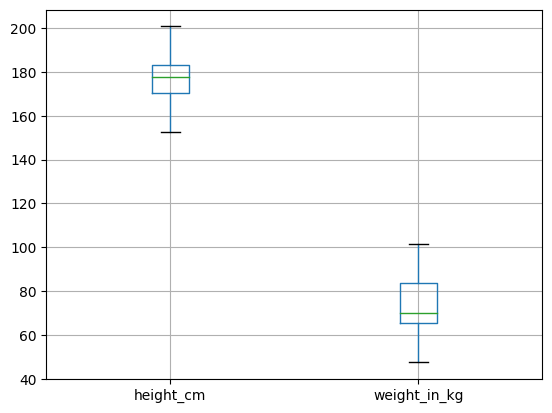

In [78]:
# Buat boxplot
df_cleaned_w[['height_cm', 'weight_in_kg']].boxplot()

# Tampilkan plot
plt.show()

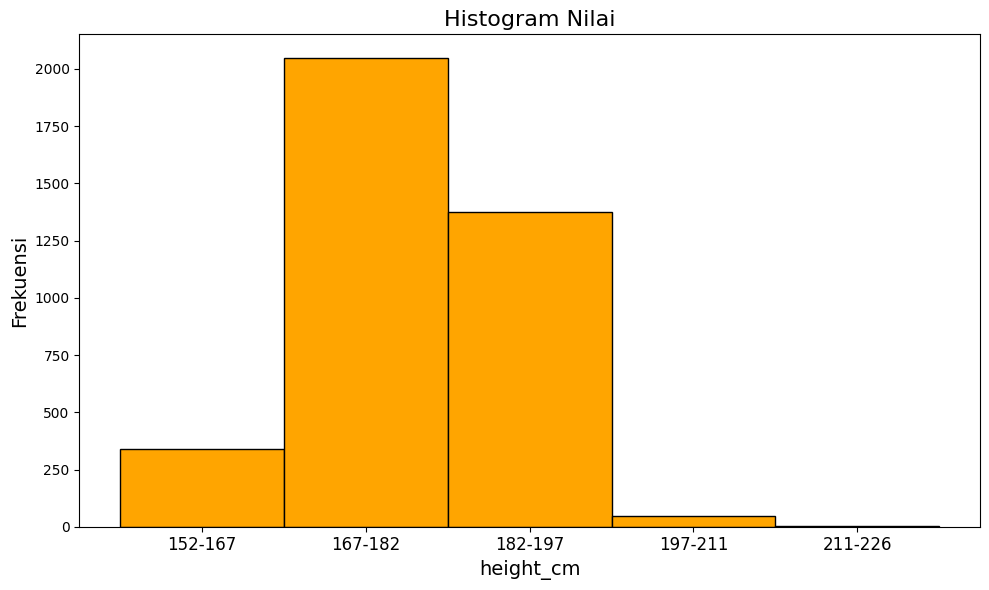

In [79]:
import matplotlib.pyplot as plt

data_height_cm = df["height_cm"]

# Buat figure dengan ukuran 10x6
plt.figure(figsize=(10, 6))

# Buat histogram
n, bins, patches = plt.hist(data_height_cm, bins=5, color='orange', edgecolor='black')

# Tambahkan Label
plt.title('Histogram Nilai', fontsize=16)
plt.xlabel('height_cm', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)

# Tampilkan rentang frekuensi di sumbu x
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, ['{:.0f}-{:.0f}'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)], fontsize=12)

# Tampilkan histogram
plt.tight_layout()
plt.show()


In [80]:
# Mengidentifikasi baris outlier berdasarkan ciri-ciri yang unik

outliers_condition = ((df['height_cm'] > upper_bound_height) | (df['height_cm'] < lower_bound_height)) | (df['weight_in_kg'] < 30) | (df['weight_in_kg'] > 200)

# Drop baris yang memenuhi kondisi di atas (outliers)
df_cleaned = df[~outliers_condition]  # Tanda ~ untuk negasi (tidak termasuk kondisi outlier)

# Menampilkan data setelah penghapusan outliers
print(df_cleaned.tail())

                   name nickname  wins  losses  draws  height_cm  \
4106    John Campetella      NaN     0       1      0     175.26   
4107  Andre Pederneiras      NaN     1       1      2     172.72   
4108      Bryson Kamaka      NaN    12      20      1     180.34   
4109        Matej Penaz    Money     6       1      0     190.50   
4110     Pauline Macias     PITA     4       1      0     162.56   

      weight_in_kg  reach_in_cm    stance date_of_birth  \
4106        106.59          NaN  Orthodox           NaN   
4107         70.31          NaN  Orthodox    1967-03-22   
4108         77.11          NaN  Orthodox           NaN   
4109         83.91       210.82  Southpaw    1996-10-14   
4110         52.16       162.56  Southpaw    1988-06-27   

      significant_strikes_landed_per_minute  significant_striking_accuracy  \
4106                                   0.00                            0.0   
4107                                   0.00                            0.0   
41

**Cek korelasi melalui scatter plot**

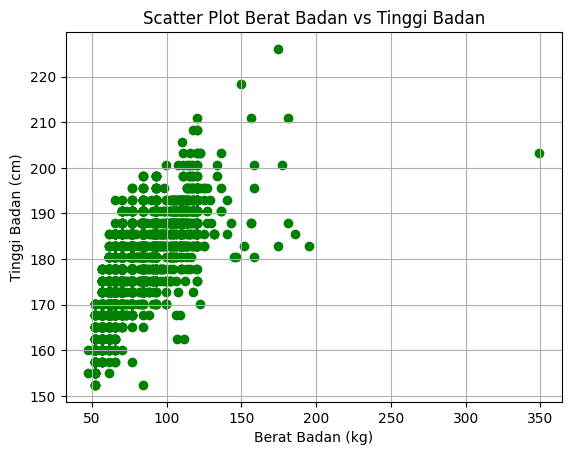

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Membuat scatter plot antara weight_in_kg dan height_cm dengan warna penanda hijau
plt.scatter(df['weight_in_kg'], df['height_cm'], color='green', marker='o')

# Menambahkan judul dan label pada sumbu
plt.title('Scatter Plot Berat Badan vs Tinggi Badan')
plt.xlabel('Berat Badan (kg)')
plt.ylabel('Tinggi Badan (cm)')

# Menampilkan grid dan plot
plt.grid(True)
plt.show()
